In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [7]:
df =pd.read_csv('homeprices.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [10]:
model=linear_model.LinearRegression()
model.fit(df[['area']],df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
model.coef_

array([135.78767123])

In [13]:
model.intercept_

np.float64(180616.43835616432)

In [14]:
model.predict([[500]])

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([248510.2739726])

In [15]:
import pickle

In [17]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [19]:
with open('model_pickle','rb') as f:
    mp= pickle.load(f)

In [20]:
mp.predict([[5000]])

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [27]:
import joblib

In [28]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [30]:
mj= joblib.load('model_joblib')

In [31]:
mj.predict([[5000]])

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [32]:
p=pd.read_csv('homeprices (1).csv')
p

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


## Get dummies 

In [34]:
pd.get_dummies(p.town).astype(int)

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


## Marketing Sales

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')


#### Read the dataset and preview

In [10]:
mk = pd.read_csv("Marketing_Sales_Data.csv")
mk.head()

,TV_Spend,Radio_Spend,SocialMedia_Spend,Influencer_Spend,Website_Visits,Sales
0,17483.57,12198.07,3649.64,200.00,13092,97139.60
1,14308.68,10773.90,4710.96,1139.61,19750,94581.73
2,18238.44,8178.89,3415.16,1586.39,20144,73678.61
3,22615.15,6059.19,4384.08,3887.69,23781,126148.44
4,13829.23,10094.67,1212.77,2556.55,9065,104970.28


### Check number of row and columns in the dataset

In [12]:
mk.shape

(1000, 6)

## Exploratory  Data Analysis (EDA)

### Check for missing values

In [14]:
mk.isnull().sum()

TV_Spend             0
Radio_Spend          0
SocialMedia_Spend    0
Influencer_Spend     0
Website_Visits       0
Sales                0
dtype: int64

### Descrptive Statistics

In [15]:
mk.describe()

,TV_Spend,Radio_Spend,SocialMedia_Spend,Influencer_Spend,Website_Visits,Sales
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,15100.524060,8215.018610,5011.730400,1996.122620,19667.212000,102830.632100
std,4856.441229,2933.714206,1927.170487,994.592365,7780.572491,27539.099792
min,3000.000000,1000.000000,500.000000,200.000000,2000.000000,23986.130000
25%,11762.052500,6181.277500,3704.002500,1262.580000,14538.250000,84017.257500
50%,15126.505000,8189.230000,4999.495000,2000.185000,19854.000000,103299.000000
75%,18239.717500,10186.647500,6321.830000,2666.947500,25112.500000,121616.002500
max,30000.000000,15000.000000,10000.000000,5000.000000,44903.000000,188879.880000


### Visualize Relationships

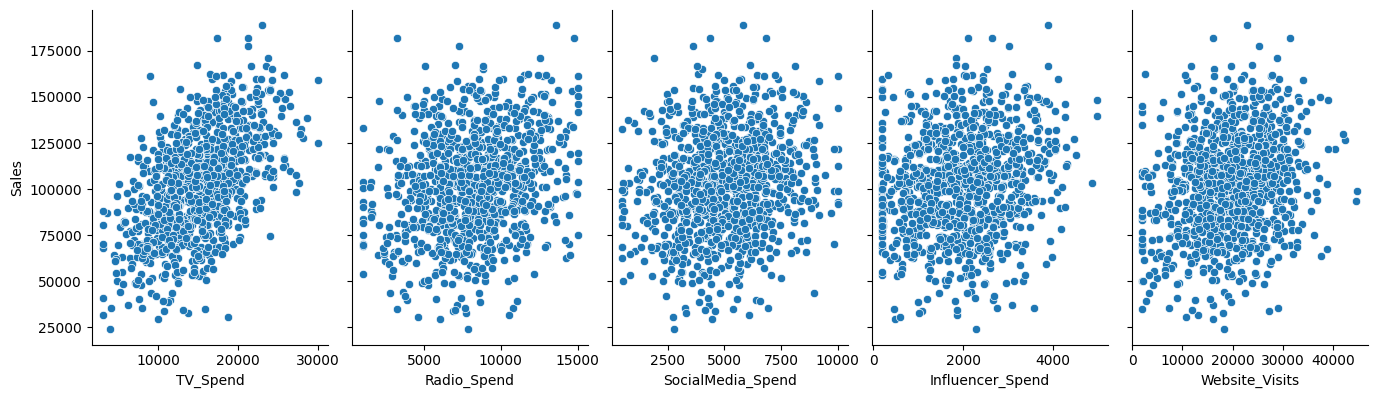

In [16]:
sns.pairplot(mk, x_vars=['TV_Spend', 'Radio_Spend', 'SocialMedia_Spend', 'Influencer_Spend', 'Website_Visits'],
             y_vars='Sales', height = 4 , aspect =0.7)
plt.show()

###  Correlation Heatmap
Look for high correlation with Sales e.g., TV_Spend, Website_Visits usually strong.

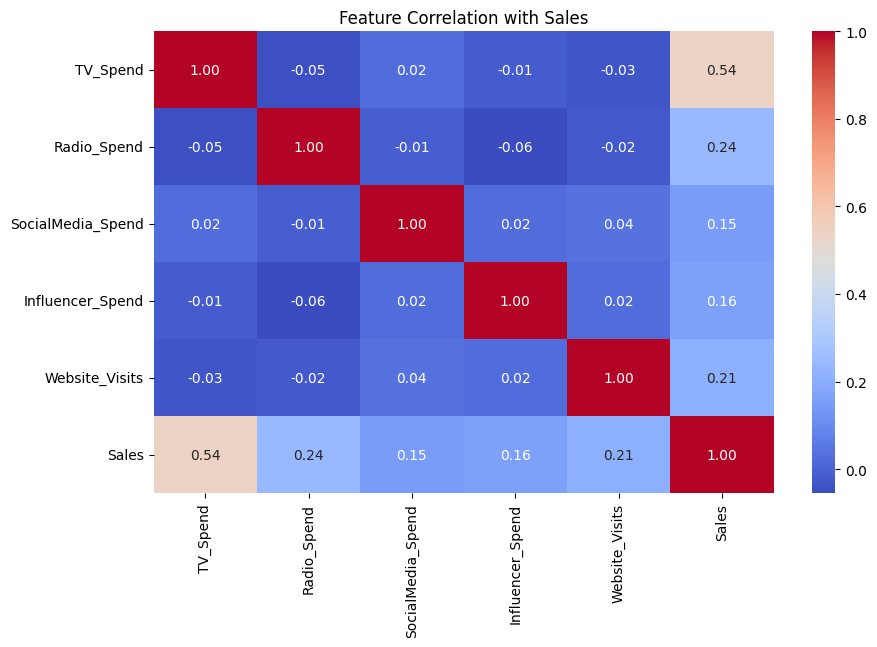

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(mk.corr(), annot =True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with Sales')
plt.show()

### Prepare Features & Target

In [19]:
x = mk.drop('Sales', axis =1)
y = mk['Sales']

## Train-Test Split(80-20)

In [21]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 42)
print(f'training samples:{x_train.shape[0]}')
print(f'testing sample: {x_test.shape[0]}')

training samples:800
testing sample: 200


### Train Linear Regression Model

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)

print("Model trained")

Model trained


## Get Coefficients 

In [26]:
coeff_mk = pd.DataFrame(model.coef_,x.columns, columns=['Coefficient'])
coeff_mk

,Coefficient
TV_Spend,3.167963
Radio_Spend,2.674696
SocialMedia_Spend,1.989371
Influencer_Spend,4.623706
Website_Visits,0.777479


#### Make predictions

In [28]:
y_pred = model.predict(x_test)

### Evaluate the Model

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R2: {r2:.4f}")

MAE: 15,840.95
RMSE: 19,694.25
R2: 0.4764


### Visualise predictions

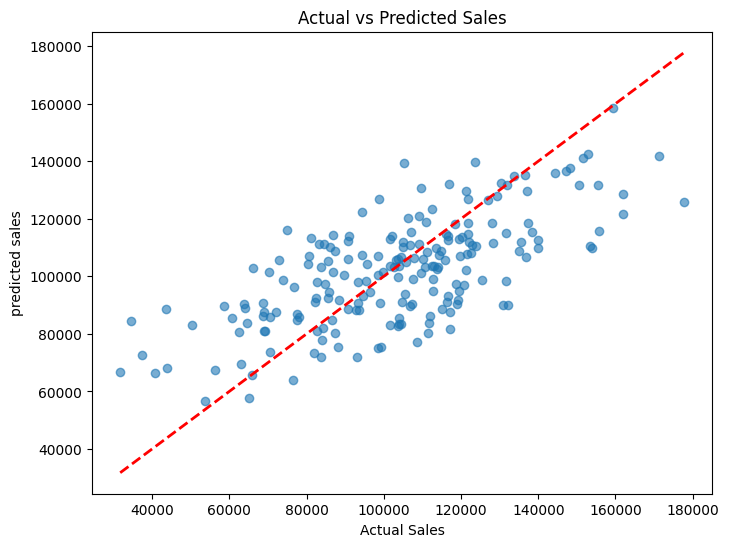

In [32]:
plt.figure(figsize =(8,6))
plt.scatter(y_test,y_pred, alpha =0.6)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'r--',lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('predicted sales')
plt.title("Actual vs Predicted Sales")
plt.show()

### Predict on New Data

In [35]:
# Example: New campaign
new_data = pd.DataFrame({
    'TV_Spend': [18000],
    'Radio_Spend': [9000],
    'SocialMedia_Spend': [4000],
    'Influencer_Spend': [2000],
    'Website_Visits': [15000]
})
predicted_sales = model.predict(new_data)
print(f"Predicted Sales: ${predicted_sales[0]:,.2f}")

Predicted Sales: $108,217.23


## Save the Model

In [37]:
import joblib
joblib.dump(model,'sales_prediction_model.pkl')

['sales_prediction_model.pkl']

## To load a model

In [38]:
model = joblib.load('sales_prediction_model.pkl')

In [39]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### New Data

In [40]:
new_data = pd.DataFrame({
    'TV_Spend': [18000],
    'Radio_Spend': [9000],
    'SocialMedia_Spend': [4000],
    'Influencer_Spend': [2000],
    'Website_Visits': [15000]
})

## Make Predictions 

In [43]:
predicted_sales = model.predict(new_data)
print(f"Predicted Sales: ${predicted_sales[0]:,.2f}")

Predicted Sales: $108,217.23


### Build a Streamlit Web app 